# 1. Tổng quan về bài toán





Thị trường bất động sản là một trong những thị trường được chú trọng nhất về giá cả và liên tục biến động. Đây là một trong những lĩnh vực chính để áp dụng các ý tưởng của máy học về cách cải thiện chi phí với độ chính xác cao. Mục tiêu của dự án là dự đoán giá trị thị trường của bất động sản. Hệ thống này giúp tìm giá khởi điểm cho một bất động sản dựa trên các biến đặc điểm của ngôi nhà. Bằng cách phá vỡ các khuôn mẫu thị trường và phạm vi giá trị trong quá khứ, kết hợp với những cải tiến về mặt kỹ thuật sẽ có thể dự đoán được giá trị trong tương lai. Việc này có nghĩa là dự đoán giá nhà ở **Ames** (Ames là một thành phố ở Quận Story, Iowa, Hoa Kỳ). Nó sẽ giúp khách hàng đưa các nguồn lực vào một yêu cầu mà không cần thông qua một nhà môi giới.

## 1.1 Vấn đề cần giải quyết

Ở đây chúng ta có một vấn đề: Yêu cầu một người mua nhà ở Ames, Iowa mô tả ngôi nhà mơ ước của họ, và họ có thể sẽ không bắt đầu với chiều cao của trần nhà hoặc khoảng cách với các siêu thị gần đó. Với những mô tả này, bạn bắt đầu dự đoán giá của ngôi nhà mơ ước này sẽ là bao nhiêu.

Dựa trên thông tin đó, chúng ta có thể thấy rằng chúng ta đang giải quyết **vấn đề hồi quy**: đưa ra một đầu vào bao gồm **tất cả các đặc điểm về ngôi nhà**, trả về **giá của ngôi nhà** như một đầu ra. Lần này, chúng ta sử dụng tập dữ liệu từ một cuộc thi trên [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/description). Bộ dữ liệu này chứng minh rằng có nhiều sự ảnh hưởng nhiều hơn đến việc đàm phán giá so với số lượng phòng ngủ hoặc hàng rào màu trắng. Với 79 biến số mô tả (hầu hết) mọi khía cạnh của một ngôi nhà dân dụng, chúng ta sẽ dự đoán giá cuối cùng của mỗi ngôi nhà ở Ames. Sử dụng **MSE** (Mean squared error) giữa giá trị dự đoán và giá trị được quan sát thực làm chỉ số đo sự sai lệch, chúng ta muốn chỉ số này gần bằng 0. Đây là cách chúng ta đánh giá và chọn mô hình tốt nhất từ một loạt mô hình hồi quy với các tham số khác nhau. Mô hình có RMSE nhỏ nhất là mô hình cuối cùng của chúng ta.

Trong dự án này, chúng tôi sẽ thực hiện những việc sau:

1. Nạp dữ liệu bằng Pandas
2. Tìm số giá trị NULL trong mỗi cột
3. Tiền xử lý dữ liệu
4. Sử dụng hồi quy để tìm mô hình phù hợp với dữ liệu
5. Cải thiện hồi quy với Grid Search
6. Phân tích kết quả
7. Sử dụng mô hình được huấn luyện cuối cùng để đưa ra dự đoán

## 1.2 Tìm hiểu về tập dữ liệu

- Đầu tiên, chúng ta phải nạp tập dữ liệu

In [78]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm

%matplotlib inline
color = sns.color_palette()
sns.set_style('darkgrid')

In [79]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [80]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [81]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


- Thoạt nhìn, kích thước của tập dữ liệu huấn luyện và tập dữ liệu kiểm tra tương ứng với 1460 hàng × 81 cột và 1459 hàng × 80 cột, có nghĩa là chúng ta có tổng cộng 2919 mẫu và 80 thuộc tính (đặc điểm) của các ngôi nhà. Cột cuối cùng là 'SalePrice', giá của căn nhà.

In [82]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [83]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

- Thứ hai, nhiều cột trong tập dữ liệu có định dạng 'object'. Phần còn lại có định dạng 'int64' hoặc 'float'. Đối với định dạng 'object', có rất nhiều giá trị bị thiếu. Điều này không có nghĩa là "không tồn tại" giá trị cho các thuộc tính này, chúng có ý nghĩa riêng của chúng. Ví dụ: các giá trị rỗng trong 'Alley' biểu thị "No alley access". Tuy nhiên, những giá trị còn thiếu này cần được điền hoặc xóa trước khi thực hiện quá trình huấn luyện.

In [84]:
## PUT YOUR CODE HERE:
print('Number of missing values in the training dataset:',sum(train.isnull().sum()))

Number of missing values in the training dataset: 6965


In [85]:
## PUT YOUR CODE HERE:
print('Number of missing values in the test dataset:', sum(test.isnull().sum()))

Number of missing values in the test dataset: 7000


- Chúng ta sẽ vẽ đồ thị thể hiện tỉ lệ của các "missing values" của từng cột dữ liệu.

In [86]:
## PUT YOUR CODE HERE:
y = train['SalePrice']
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)

all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(5)

,Missing Ratio
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
FireplaceQu,48.646797


In [87]:
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2919, 80)


Text(0.5, 1.0, 'Percent missing data by feature')

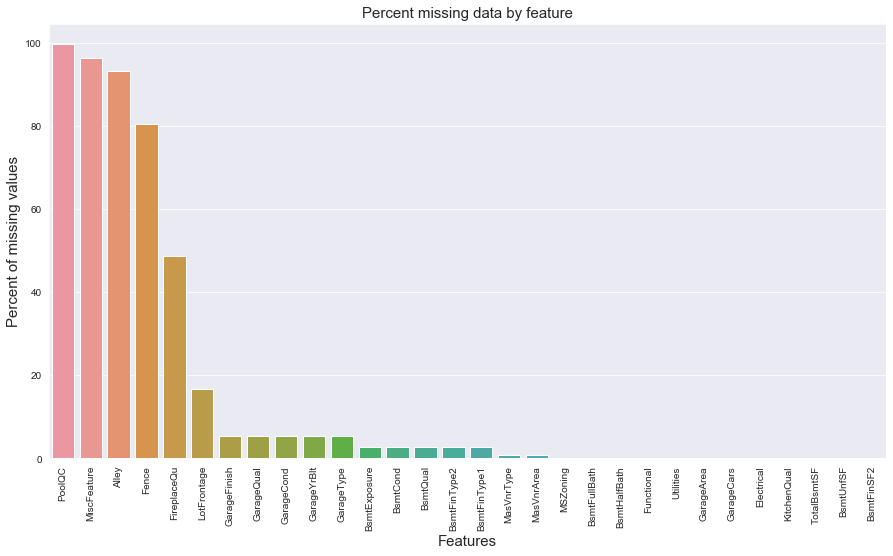

In [88]:
## PUT YOUR CODE HERE:
f, ax = plt.subplots(figsize=(15, 8))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

- Như vậy chúng ta có thể thấy có 4 thuộc tính có tỉ lệ missing values khá cao, lần lượt là **'PoolQC', 'Fence', 'MiscFeature'** và **'Alley'**. Chúng ta sẽ xử lý các "missing values" này cũng như các "missing values" khác.

- Dựa trên hình ảnh bên dưới, chúng ta có thể chắc chắn rằng hầu hết tất cả các ngôi nhà ở Ames đều có giá khoảng \\$100000 đến \\$200000. Và phân bố này cũng bị lệch phải


 mu = 180921.20 and sigma = 79415.29



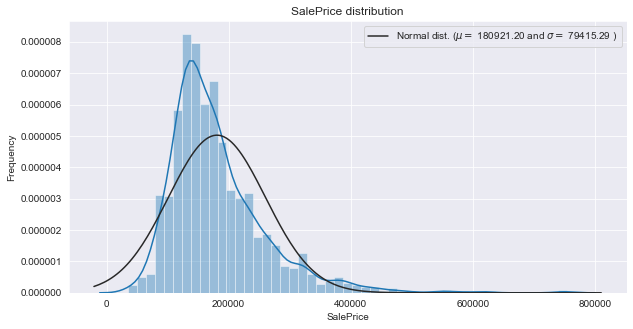

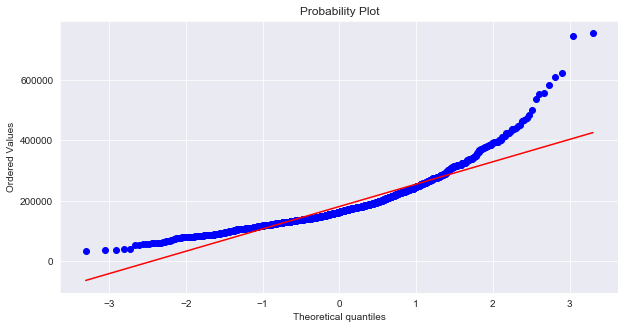

In [89]:
## PUT YOUR CODE HERE:
plt.subplots(figsize=(10,5))
sns.distplot(y, fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(y)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure(figsize=(10,5))
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

- Chúng ta cũng sẽ tìm hiểu mối tương quan giữa các tính chất của mô nhà bằng ma trận tương quan. Theo như bảng dưới mô tả thì có khá nhiều dữ liệu dạng số có độ tương quan cao với giá nhà. Mặc khác, một vài tính chất của ngôi nhà có độ tương quan thấp giá bán như **'MSSubClass', 'OverallCond', 'YrSold'** và **'MoSold'** vốn dĩ là biến phân loại mặc dù mang giá trị số.

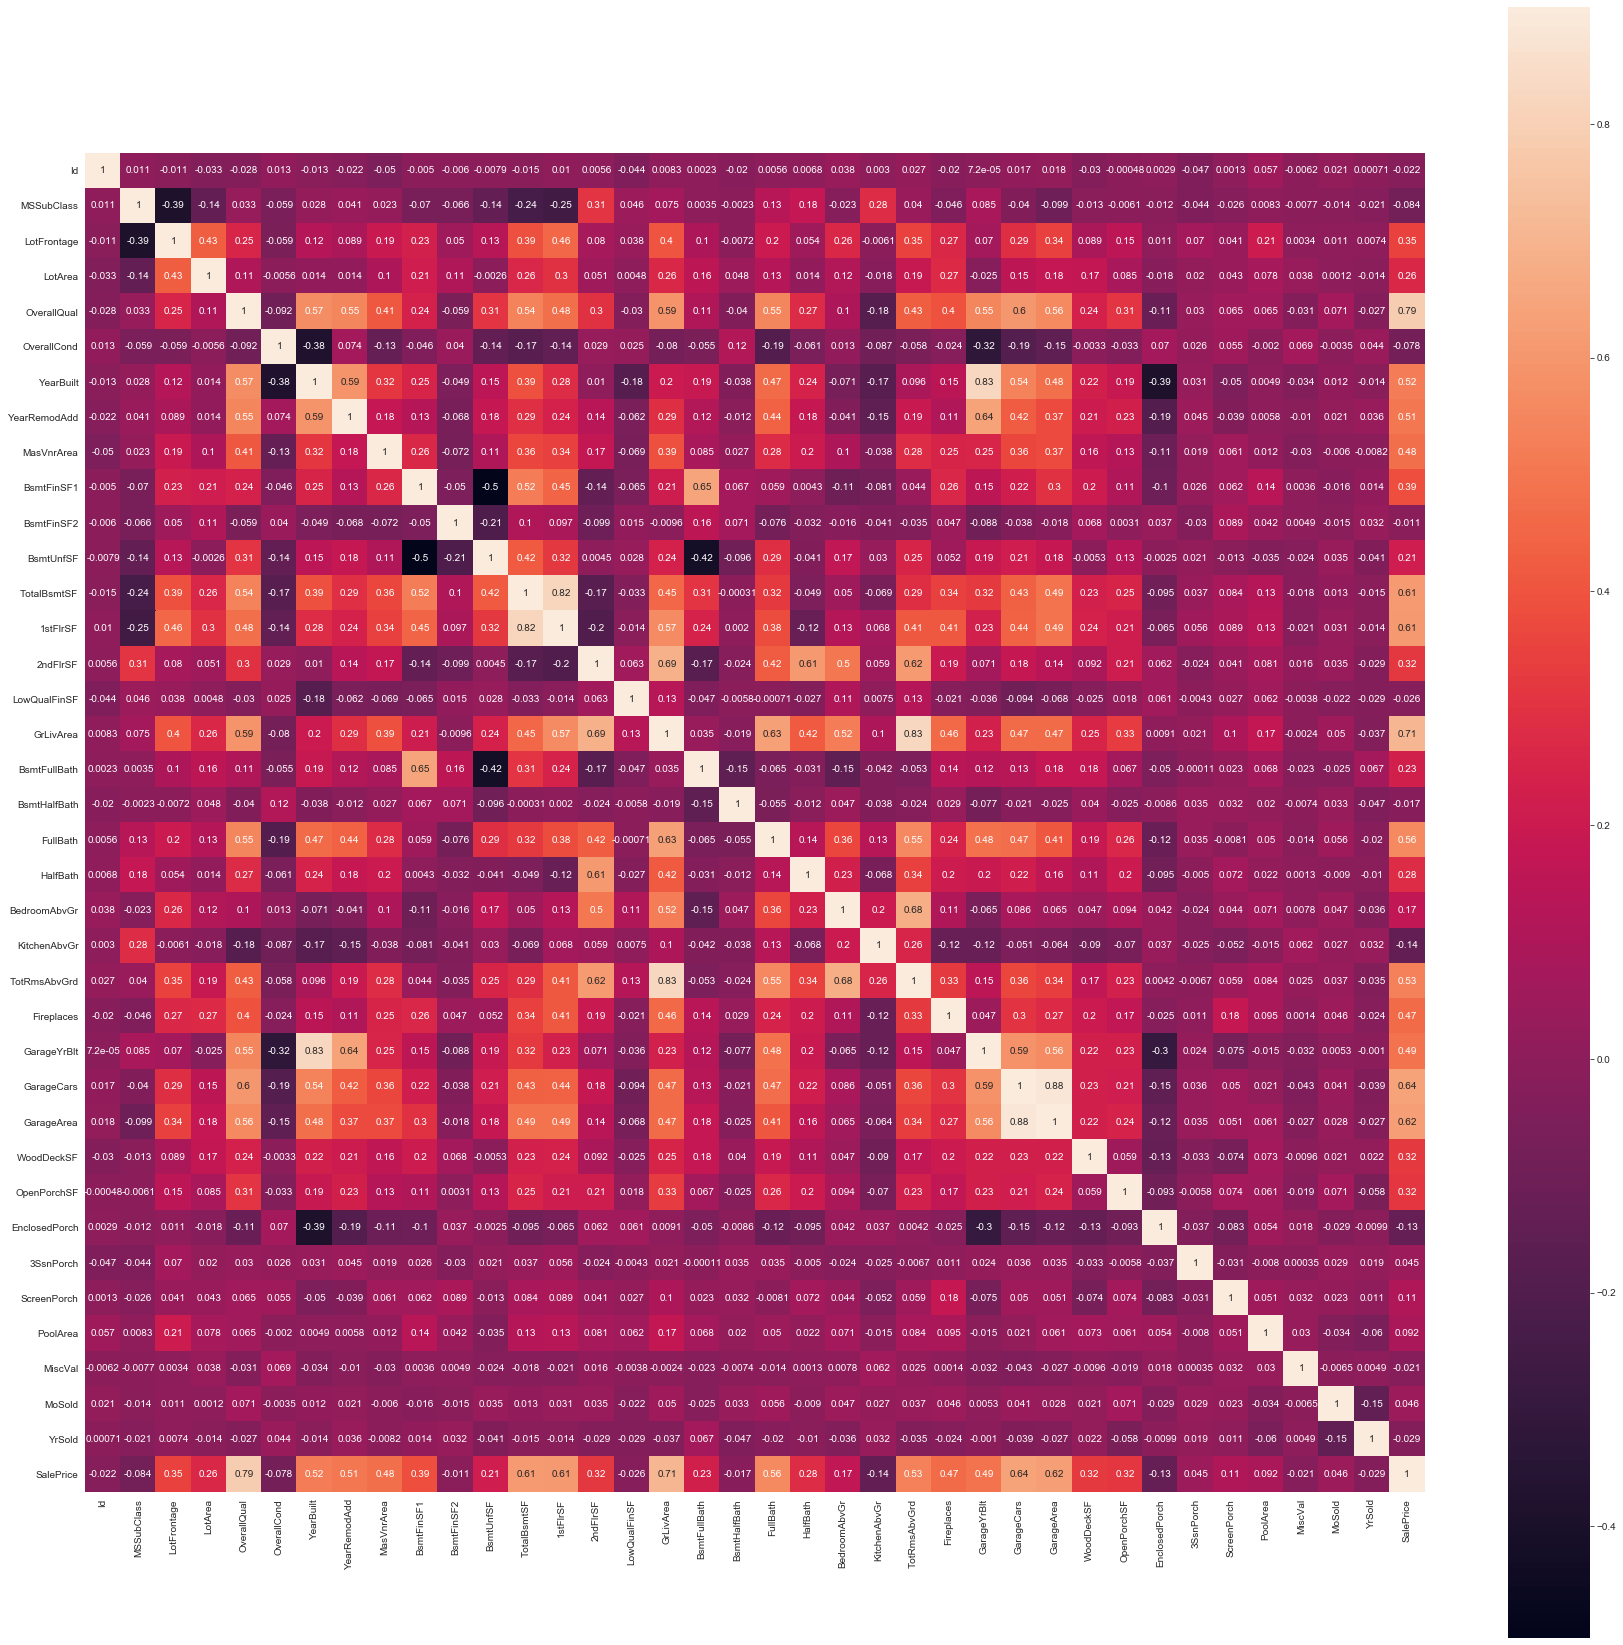

In [90]:
## PUT YOUR CODE HERE:
corrmat = train.corr()
plt.subplots(figsize=(30,30))
sns.heatmap(corrmat, vmax=0.9, square=True, annot=True)

# 2. Tiền xử lý dữ liệu

- Nạp lại tập dữ liệu

In [411]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

ntrain = train.shape[0]
ntest = test.shape[0]

y = train.SalePrice.values

all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)

In [412]:
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

train_ID = train['Id']
test_ID = test['Id']

train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (1460, 81) 
The test data size before dropping Id feature is : (1459, 80) 

The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


Chúng ta xử lý các giá trị bị thiếu bằng cách xử lý tuần tự từng thuộc tính có giá trị bị thiếu.

## 2.1 Xử lý đặc trưng bị thiếu

- **PoolQC**: mô tả dữ liệu cho biết NA có nghĩa là "No  Pool". Điều đó khá dễ hiểu, với tỷ lệ giá trị bị thiếu rất lớn (hơn 99%) và phần lớn các ngôi nhà nói chung không có hồ bơi, thay thế dữ liệu bằng 'None'

- **MiscFeature** : mô tả dữ liệu cho biết NA có nghĩa là "no misc feature", thay thế dữ liệu bằng 'None'

- **Alley** : mô tả dữ liệu cho biết NA có nghĩa là "no alley access", thay thế dữ liệu bằng 'None'

- **Fence** : mô tả dữ liệu cho biết NA có nghĩa là "no fence", thay thế dữ liệu bằng 'None'

- **FireplaceQu** : mô tả dữ liệu cho biết NA có nghĩa là "no fireplace", thay thế dữ liệu bằng 'None'

- **MSSubClass** : Na rất có thể có nghĩa là "no building class". Chúng ta có thể thay thế các giá trị bị thiếu bằng "None"

- **GarageType, GarageFinish, GarageQual** và **GarageCond** : thay thế dữ liệu bằng 'None'

In [378]:
cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 
        'FireplaceQu', 'MSSubClass', 'GarageType', 
        'GarageFinish', 'GarageQual', 'GarageCond']
## PUT YOUR CODE HERE:
for col in cols:
    all_data[col] = all_data[col].fillna('None')

- **LotFrontage** : chúng ta có thể **điền các giá trị còn thiếu bằng giá trị trung bình LotFrontage của khu vực lân cận**. (do các ngôi nhà trong các khu vực gần nhau thường có diện tích tương đồng)

In [379]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
## PUT YOUR CODE HERE:
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

- **GarageYrBlt, GarageArea** và **GarageCars** : Thay thế dữ liệu bị thiếu bằng 0 (Vì Không có ga ra đồng nghĩa không có ô tô nào trong ga ra đó và diện tích của ga ra bằng 0.)

- **BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath** và **BsmtHalfBath** : Thay thế dữ liệu bị thiếu bằng 0 (ý nghĩa tương tự như ga ra)

- **BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1** và **BsmtFinType2** : Thay thế dữ liệu bị thiếu bằng 'None' (ý nghĩa tương tự như ga ra)

In [380]:
cols = ['GarageYrBlt', 'GarageArea', 'GarageCars', 
        'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
        'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']
## PUT YOUR CODE HERE:
for col in cols:
    all_data[col] = all_data[col].fillna(0)

In [381]:
cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
## PUT YOUR CODE HERE:
for col in cols:
    all_data[col] = all_data[col].fillna('None')

- **MasVnrArea** and **MasVnrType** : NA rất có thể có nghĩa là không có ván xây cho những ngôi nhà này. Chúng ta có thể điền 0 cho Area và None cho Type.

In [382]:
## PUT YOUR CODE HERE:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

- **MSZoning (The general zoning classification)** :  'RL' là giá trị phổ biến nhất. Vì vậy, chúng ta có thể điền vào các giá trị còn thiếu bằng 'RL'

In [383]:
## PUT YOUR CODE HERE:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

- **Utilities** : Đối với thuộc tính phân loại này, tất cả các bản ghi đều là "AllPub", ngoại trừ một "NoSeWa" và 2 NA. **Do đó thuộc tính này sẽ không giúp ích trong việc thiết lập mô hình dự đoán**. Nên chúng ta có thể loại bỏ nó một cách an toàn.

In [384]:
## PUT YOUR CODE HERE:
all_data = all_data.drop(['Utilities'], axis=1)

- **Functional** : mô tả dữ liệu cho biết NA có nghĩa là chức năng điển hình, chúng ta điền các giá trị bị thiếu bằng "Typ"

- **Electrical** : Nó chỉ có một giá trị NA. Vì giá trị của thuộc tính này chủ yếu là 'SBrkr', nên chúng ta có thể đặt giá trị đó cho giá trị còn thiếu.

- **KitchenQual**: tương tự với Electrical, chúng ta đặt 'TA' (là giá trị phổ biến nhất) cho dữ liệu bị thiếu trong KitchenQual.

- **Exterior1st và Exterior2nd** : tương tự với Electrical, điền các giá trị bị thiếu bằng giá trị phổ biến nhất

- **SaleType** : tương tự với Electrical, điền các giá trị bị thiếu bằng giá trị phổ biến nhất

In [385]:
## PUT YOUR CODE HERE:
all_data["Functional"] = all_data["Functional"].fillna("Typ")

In [386]:
from sklearn.impute import SimpleImputer

cols = ['Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType']
## PUT YOUR CODE HERE:
si = SimpleImputer(strategy='most_frequent')
all_data[cols] = si.fit_transform(all_data[cols])

- Kiểm tra các giá trị bị thiếu còn tồn tại hay không

In [387]:
## PUT YOUR CODE HERE:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


Tập dữ liệu đã không còn các giá trị bị thiếu.

## 2.2 Xử lý biến dữ liệu số thật ra là biến hạng mục

- Tiếp theo, chúng ta biến đổi một số biến giá trị số thực ra là biến phân loại

In [388]:
# 'MSSubClass' is transformed into categorical features.
# Changing 'OverallCond' into a categorical variable
# 'YrSold' and 'MoSold' are transformed into categorical features.


cols = ['MSSubClass', 'OverallCond', 'YrSold', 'MoSold']
## PUT YOUR CODE HERE:
for col in cols:
    all_data[col] = all_data[col].astype(str)

- Mã hóa nhãn (Label encoding) một số biến phân loại.

In [375]:
from sklearn.preprocessing import LabelEncoder

cols_label = ['FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold']
## PUT YOUR CODE HERE:
# process columns, apply LabelEncoder to categorical features
for c in cols_label:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2919, 79)


## 2.3 Thêm một vài thuộc tính mới

Vì các đặc điểm liên quan đến diện tích rất quan trọng để xác định giá nhà nên chúng ta bổ sung thêm một đặc điểm nữa là tổng diện tích tầng hầm, diện tích tầng 1 và tầng 2 của mỗi ngôi nhà

In [389]:
## PUT YOUR CODE HERE:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [390]:
all_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,...,0,None,None,None,0,2,2008,WD,Normal,2566.0
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,...,0,None,None,None,0,5,2007,WD,Normal,2524.0
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,...,0,None,None,None,0,9,2008,WD,Normal,2706.0
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,2473.0
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,...,0,None,None,None,0,12,2008,WD,Normal,3343.0


- Chia tập huấn luyện và tập kiểm tra mới

In [391]:
train = all_data[:ntrain]
test = all_data[ntrain:]

### Loại bỏ thuộc tính bằng đệ quy

In [31]:
from sklearn.ensemble import GradientBoostingRegressor
from feature_engine.selection import RecursiveFeatureElimination

In [32]:
# build initial model using all the features
model = GradientBoostingRegressor(n_estimators=10, max_depth=4, random_state=10)

# Setup the RFE selector

sel = RecursiveFeatureElimination(
    variables=None, # automatically evaluate all numerical variables
    estimator = model, # the ML model
    scoring = 'neg_mean_squared_error', # the metric we want to evalute
    threshold = 0.001, # the maximum performance drop allowed to remove a feature
    cv=3, # cross-validation
)

# this may take quite a while, because
# we are building a lot of models with cross-validation
sel.fit(train, y)

RecursiveFeatureElimination(estimator=GradientBoostingRegressor(max_depth=4,
                                                                n_estimators=10,
                                                                random_state=10),
                            scoring='neg_mean_squared_error', threshold=0.001)

In [33]:
# performance of model trained using all features

sel.initial_model_performance_

-1784342314.7639267

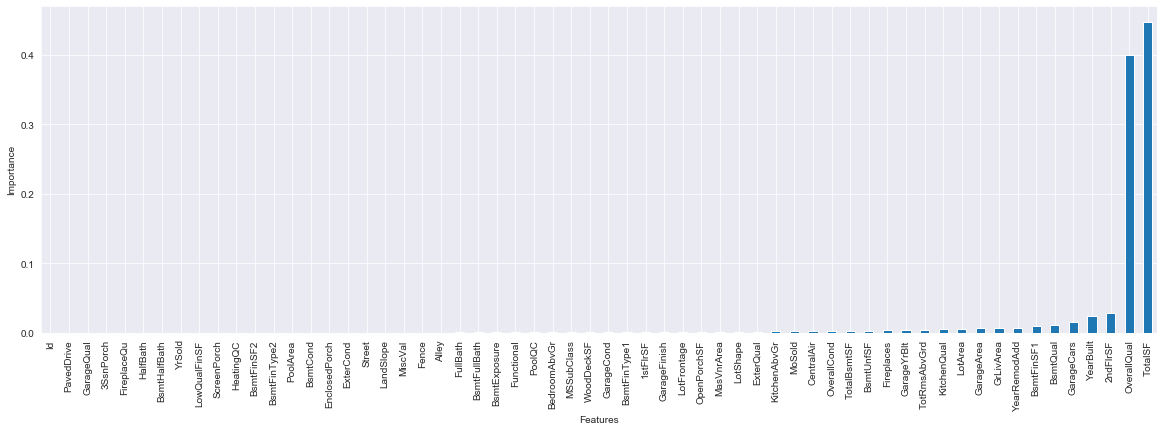

In [34]:
# importance of all features based of initial model

sel.feature_importances_.plot.bar(figsize=(20,6))
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

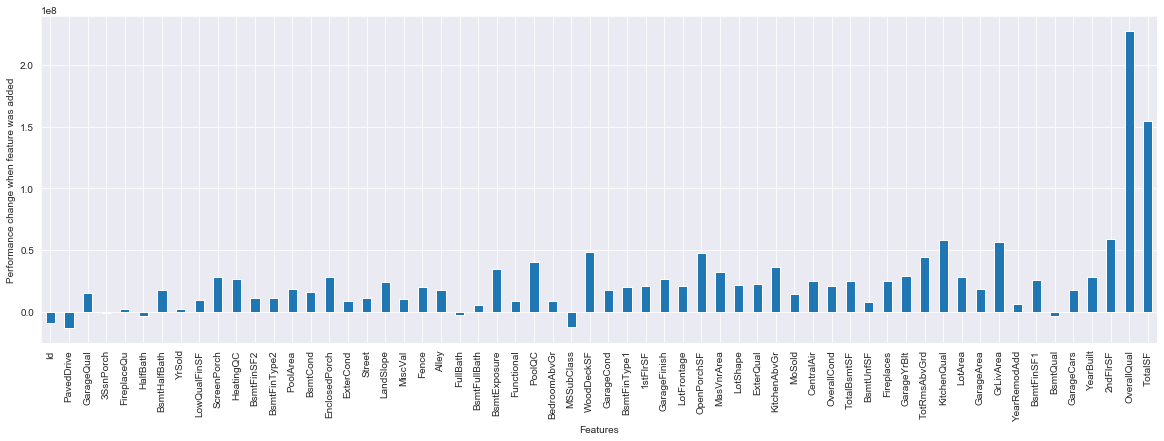

In [35]:
pd.Series(sel.performance_drifts_).plot.bar(figsize=(20,6))
plt.xlabel('Features')
plt.ylabel('Performance change when feature was added')
plt.show()

In [36]:
sel.features_to_drop_

['Id',
 'MSSubClass',
 'BsmtQual',
 'FullBath',
 'HalfBath',
 'PavedDrive',
 '3SsnPorch']

In [37]:
train = sel.transform(train)
test = sel.transform(test)

### Thêm vào thuộc tính bằng đệ quy

In [38]:
from sklearn.ensemble import GradientBoostingRegressor
from feature_engine.selection import RecursiveFeatureAddition

In [39]:
# the model for which we want to select features
model = GradientBoostingRegressor(
    n_estimators=10, max_depth=4, random_state=10)


# Setup the RFA selector
rfa = RecursiveFeatureAddition(
    variables=None,  # automatically evaluate all numerical variables
    estimator=model,  # the ML model
    scoring='neg_mean_squared_error',  # the metric we want to evalute
    threshold=0.001,  # the minimum performance increase needed to select a feature
    cv=3,  # cross-validation
)

rfa.fit(train, y)

RecursiveFeatureAddition(estimator=GradientBoostingRegressor(max_depth=4,
                                                             n_estimators=10,
                                                             random_state=10),
                         scoring='neg_mean_squared_error', threshold=0.001)

In [40]:
# performance of model trained using all features

rfa.initial_model_performance_

-1738773989.3494415

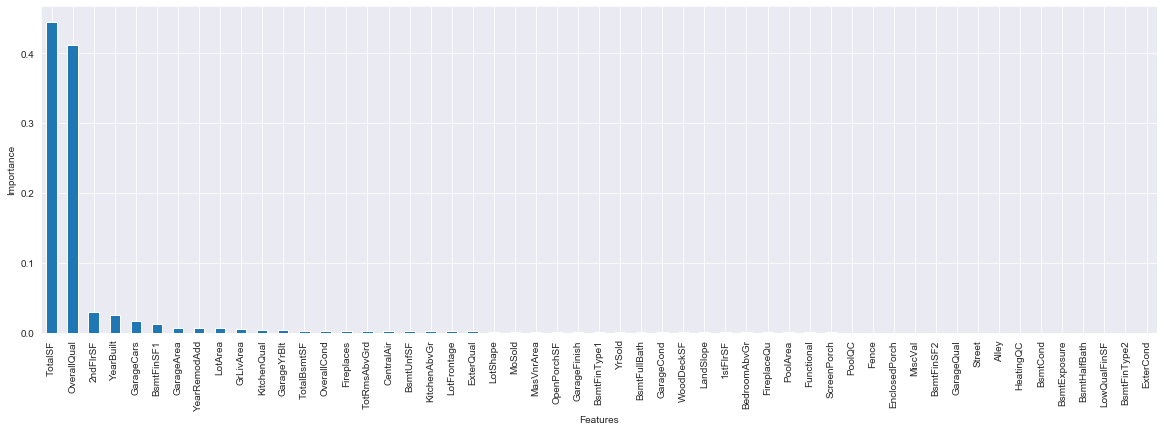

In [41]:
# importance of all features based of initial model

rfa.feature_importances_.plot.bar(figsize=(20,6))
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

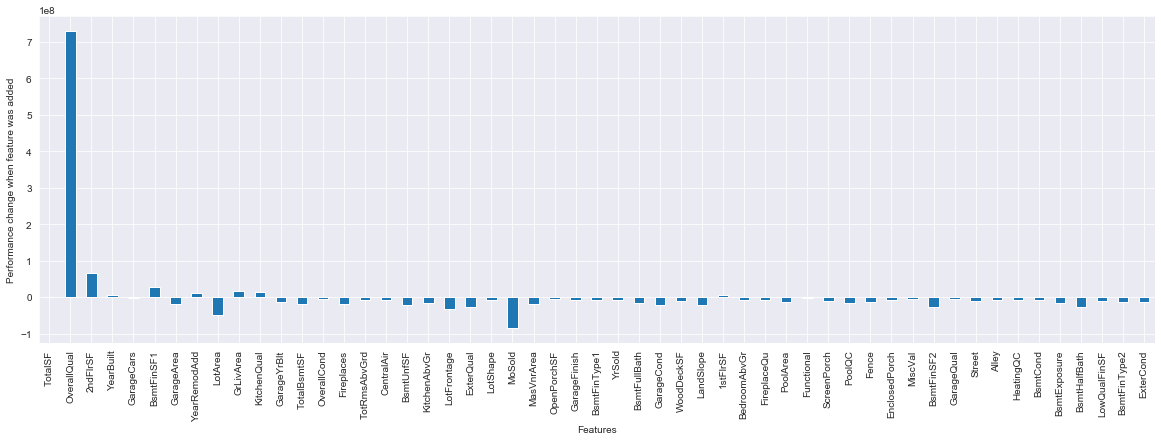

In [42]:
pd.Series(rfa.performance_drifts_).plot.bar(figsize=(20,6))
plt.xlabel('Features')
plt.ylabel('Performance change when feature was added')
plt.show()

In [43]:
rfa.features_to_drop_

['LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandSlope',
 'OverallCond',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 'CentralAir',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'PoolArea',
 'PoolQC',
 'Fence',
 'MiscVal',
 'MoSold',
 'YrSold']

In [44]:
train = rfa.transform(train)
test = rfa.transform(test)

### Loại bỏ các đặc trưng bị trùng

In [239]:
from feature_engine.selection import DropDuplicateFeatures

In [240]:
sel = DropDuplicateFeatures(variables=None, missing_values='raise')

sel.fit(train)

ValueError: Some of the variables to transform contain NaN. Check and remove those before using this transformer.

In [110]:
sel.duplicated_feature_sets_

[]

In [111]:
sel.features_to_drop_

set()

In [112]:
train = sel.transform(train)
test = sel.transform(test)

train.shape, test.shape

((1460, 80), (1459, 80))

## 2.4 Co dãn dữ liệu số

- Bây giờ chúng ta bắt đầu quá trình làm sạch dữ liệu, sau đó chúng ta sẽ xử lý các giá trị dữ liệu Số và Phân loại riêng biệt. Chúng ta sẽ chia các cột dữ liệu vào 2 loại chính: Dữ liệu số ('int64' hoặc 'float64') và Phân loại ('object'). **Nhớ là chúng ta sẽ không xử lý các cột ốn đã được mã hóa bằng Label Encoding từ trước**

- Tách riêng cột dữ liệu đã được mã hóa bằng **Label Encoding**

In [395]:
from sklearn.preprocessing import LabelEncoder

cols_label = ['FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold']
## PUT YOUR CODE HERE:
train_label = train[cols_label].copy()
test_label = test[cols_label].copy()
for c in cols_label:
    lbl = LabelEncoder() 
    lbl.fit(list(train_label[c].values)) 
    train_label[c] = lbl.transform(list(train_label[c].values))
#     test_label[c] = lbl.transform(list(test_label[c].values))

# shape        
print('Shape train data: {}'.format(train_label.shape))
# print('Shape test data: {}'.format(test_label.shape))

Shape train data: (1460, 26)


In [355]:
# ## PUT YOUR CODE HERE:
# cols_label = [x for x in train.columns if x in cols_label]
# train_label = train[cols_label]
# train = train.drop(cols_label, axis=1)

# test_label = test[cols_label]
# test = test.drop(cols_label, axis=1)

- Chia các cột dữ liệu còn lại vào 2 loại chính: Dữ liệu số ('int64' hoặc 'float64') và Phân loại ('object')

In [413]:
## PUT YOUR CODE HERE:
cat_train=[col for col in train.columns if train[col].dtype=='object'] # Categorical
num_train=[col for col in train.columns if train[col].dtype=='int64' or train[col].dtype=='float64'] # Numerical

cat_test=[col for col in test.columns if test[col].dtype=='object'] # Categorical
num_test=[col for col in test.columns if test[col].dtype=='int64' or test[col].dtype=='float64'] # Numerical

In [414]:
train_cat = train[cat_train].copy()
test_cat = test[cat_train].copy()

train_num = train[num_train].copy()
test_num = test[num_train].copy()

KeyError: "['SalePrice'] not in index"

In [398]:
train_num

,Id,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,TotalSF
0,1,65.0,8450,7,2003,2003,196.0,706.0,0.0,150.0,...,2.0,548.0,0,61,0,0,0,0,0,2566.0
1,2,80.0,9600,6,1976,1976,0.0,978.0,0.0,284.0,...,2.0,460.0,298,0,0,0,0,0,0,2524.0
2,3,68.0,11250,7,2001,2002,162.0,486.0,0.0,434.0,...,2.0,608.0,0,42,0,0,0,0,0,2706.0
3,4,60.0,9550,7,1915,1970,0.0,216.0,0.0,540.0,...,3.0,642.0,0,35,272,0,0,0,0,2473.0
4,5,84.0,14260,8,2000,2000,350.0,655.0,0.0,490.0,...,3.0,836.0,192,84,0,0,0,0,0,3343.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,62.0,7917,6,1999,2000,0.0,0.0,0.0,953.0,...,2.0,460.0,0,40,0,0,0,0,0,2600.0
1456,1457,85.0,13175,6,1978,1988,119.0,790.0,163.0,589.0,...,2.0,500.0,349,0,0,0,0,0,0,3615.0
1457,1458,66.0,9042,7,1941,2006,0.0,275.0,0.0,877.0,...,1.0,252.0,0,60,0,0,0,0,2500,3492.0
1458,1459,68.0,9717,5,1950,1996,0.0,49.0,1029.0,0.0,...,1.0,240.0,366,0,112,0,0,0,0,2156.0


In [399]:
train_cat

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,TA,TA,Y,None,None,None,2,2008,WD,Normal
1,20,RL,Pave,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,TA,TA,Y,None,None,None,5,2007,WD,Normal
2,60,RL,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,TA,TA,Y,None,None,None,9,2008,WD,Normal
3,70,RL,Pave,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,TA,TA,Y,None,None,None,2,2006,WD,Abnorml
4,60,RL,Pave,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,TA,TA,Y,None,None,None,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,Pave,None,Reg,Lvl,Inside,Gtl,Gilbert,Norm,...,TA,TA,Y,None,None,None,8,2007,WD,Normal
1456,20,RL,Pave,None,Reg,Lvl,Inside,Gtl,NWAmes,Norm,...,TA,TA,Y,None,MnPrv,None,2,2010,WD,Normal
1457,70,RL,Pave,None,Reg,Lvl,Inside,Gtl,Crawfor,Norm,...,TA,TA,Y,None,GdPrv,Shed,5,2010,WD,Normal
1458,20,RL,Pave,None,Reg,Lvl,Inside,Gtl,NAmes,Norm,...,TA,TA,Y,None,None,None,4,2010,WD,Normal


In [400]:
train_label

,FireplaceQu,BsmtQual,BsmtCond,GarageQual,GarageCond,ExterQual,ExterCond,HeatingQC,PoolQC,KitchenQual,...,LandSlope,LotShape,PavedDrive,Street,Alley,CentralAir,MSSubClass,OverallCond,YrSold,MoSold
0,3,2,4,5,5,2,4,0,3,2,...,0,3,2,1,1,1,9,4,2,4
1,5,2,4,5,5,3,4,0,3,3,...,0,3,2,1,1,1,4,7,1,7
2,5,2,4,5,5,2,4,0,3,2,...,0,0,2,1,1,1,9,4,2,11
3,2,4,1,5,5,3,4,2,3,2,...,0,0,2,1,1,1,10,4,0,4
4,5,2,4,5,5,2,4,0,3,2,...,0,0,2,1,1,1,9,4,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,5,2,4,5,5,3,4,0,3,3,...,0,3,2,1,1,1,9,4,1,10
1456,5,2,4,5,5,3,4,4,3,3,...,0,3,2,1,1,1,4,5,4,4
1457,2,4,1,5,5,0,2,0,3,2,...,0,3,2,1,1,1,10,8,4,7
1458,3,4,4,5,5,3,4,2,3,2,...,0,3,2,1,1,1,4,5,4,6


- Chúng ta sử dụng StandardScaler từ thư viện Scaler để chuẩn hóa các giá trị số để tránh các vấn đề khớp quá mức (overfitting)

In [401]:
from sklearn.preprocessing import StandardScaler
## PUT YOUR CODE HERE:
ss = StandardScaler()
train_num = ss.fit_transform(train_num)
test_num = ss.transform(test_num)
train_num = pd.DataFrame(train_num, columns=num_train)
test_num = pd.DataFrame(test_num, columns=num_test)
train_num

,Id,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,TotalSF
0,-1.730865,-0.230822,-0.207142,0.651479,1.050994,0.878668,0.514104,0.575425,-0.288653,-0.944591,...,0.311725,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.001277
1,-1.728492,0.438051,-0.091886,-0.071836,0.156734,-0.429577,-0.570750,1.171992,-0.288653,-0.641228,...,0.311725,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.052407
2,-1.726120,-0.097048,0.073480,0.651479,0.984752,0.830215,0.325915,0.092907,-0.288653,-0.301643,...,0.311725,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.169157
3,-1.723747,-0.453780,-0.096897,0.651479,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,-0.061670,...,1.650307,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-0.114493
4,-1.721374,0.616417,0.375148,1.374795,0.951632,0.733308,1.366489,0.463568,-0.288653,-0.174865,...,1.650307,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.944631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.721374,-0.364597,-0.260560,-0.071836,0.918511,0.733308,-0.570750,-0.973018,-0.288653,0.873321,...,0.311725,-0.060731,-0.752176,-0.100558,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.040114
1456,1.723747,0.661009,0.266407,-0.071836,0.222975,0.151865,0.087911,0.759659,0.722112,0.049262,...,0.311725,0.126420,2.033231,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,1.275760
1457,1.726120,-0.186231,-0.147810,0.651479,-1.002492,1.024029,-0.570750,-0.369871,-0.288653,0.701265,...,-1.026858,-1.033914,-0.752176,0.201405,-0.359325,-0.116339,-0.270208,-0.068692,4.953112,1.126022
1458,1.728492,-0.097048,-0.080160,-0.795151,-0.704406,0.539493,-0.570750,-0.865548,6.092188,-1.284176,...,-1.026858,-1.090059,2.168910,-0.704483,1.473789,-0.116339,-0.270208,-0.068692,-0.087688,-0.500404


## 2.5 Xử lý dữ liệu phân loại

- Sử dụng hàm get_dummies() để mã hóa dữ liệu dạng Phân loại

In [402]:
## PUT YOUR CODE HERE:
train_dummy = pd.concat([train_cat, test_cat], axis = 0)
train_dummy = pd.get_dummies(train_dummy, columns = cat_train)
dummy

,Id,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-1.730865,-0.230822,-0.207142,0.651479,1.050994,0.878668,0.514104,0.575425,-0.288653,-0.944591,...,0,0,0,1,0,0,0,0,1,0
1,-1.728492,0.438051,-0.091886,-0.071836,0.156734,-0.429577,-0.570750,1.171992,-0.288653,-0.641228,...,0,0,0,1,0,0,0,0,1,0
2,-1.726120,-0.097048,0.073480,0.651479,0.984752,0.830215,0.325915,0.092907,-0.288653,-0.301643,...,0,0,0,1,0,0,0,0,1,0
3,-1.723747,-0.453780,-0.096897,0.651479,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,-0.061670,...,0,0,0,1,1,0,0,0,0,0
4,-1.721374,0.616417,0.375148,1.374795,0.951632,0.733308,1.366489,0.463568,-0.288653,-0.174865,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,5.183104,-2.192851,-0.859988,-1.518467,-0.041991,-0.720298,-0.570750,-0.973018,-0.288653,-0.048086,...,0,0,0,1,0,0,0,0,1,0
2915,5.185477,-2.192851,-0.864197,-1.518467,-0.041991,-0.720298,-0.570750,-0.420316,-0.288653,-0.618589,...,0,0,0,1,1,0,0,0,0,0
2916,5.187849,4.005375,0.950423,-0.795151,-0.373198,0.539493,-0.570750,1.711535,-0.288653,-1.284176,...,0,0,0,1,1,0,0,0,0,0
2917,5.190222,-0.364597,-0.007600,-0.795151,0.686666,0.345679,-0.570750,-0.233889,-0.288653,0.017567,...,0,0,0,1,0,0,0,0,1,0


In [403]:
train_cat = dummy[0:ntrain]
test_cat = dummy[ntrain:]
# train1
train_cat

,Id,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-1.730865,-0.230822,-0.207142,0.651479,1.050994,0.878668,0.514104,0.575425,-0.288653,-0.944591,...,0,0,0,1,0,0,0,0,1,0
1,-1.728492,0.438051,-0.091886,-0.071836,0.156734,-0.429577,-0.570750,1.171992,-0.288653,-0.641228,...,0,0,0,1,0,0,0,0,1,0
2,-1.726120,-0.097048,0.073480,0.651479,0.984752,0.830215,0.325915,0.092907,-0.288653,-0.301643,...,0,0,0,1,0,0,0,0,1,0
3,-1.723747,-0.453780,-0.096897,0.651479,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,-0.061670,...,0,0,0,1,1,0,0,0,0,0
4,-1.721374,0.616417,0.375148,1.374795,0.951632,0.733308,1.366489,0.463568,-0.288653,-0.174865,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.721374,-0.364597,-0.260560,-0.071836,0.918511,0.733308,-0.570750,-0.973018,-0.288653,0.873321,...,0,0,0,1,0,0,0,0,1,0
1456,1.723747,0.661009,0.266407,-0.071836,0.222975,0.151865,0.087911,0.759659,0.722112,0.049262,...,0,0,0,1,0,0,0,0,1,0
1457,1.726120,-0.186231,-0.147810,0.651479,-1.002492,1.024029,-0.570750,-0.369871,-0.288653,0.701265,...,0,0,0,1,0,0,0,0,1,0
1458,1.728492,-0.097048,-0.080160,-0.795151,-0.704406,0.539493,-0.570750,-0.865548,6.092188,-1.284176,...,0,0,0,1,0,0,0,0,1,0


In [404]:
train_num.shape

(1460, 34)

In [405]:
train_cat.shape

(1460, 196)

In [406]:
train_label.shape

(1460, 26)

In [407]:
train_final.shape

(1460, 282)

- Sau đó, chúng ta kết hợp ba tập dữ liệu số, phân loại và Label Encoding sau khi đã xử lý riêng biệt.

In [408]:
train_final = pd.concat([train_num, train_cat, train_label], axis=1)
test_final = pd.concat([test_num, test_cat, test_label], axis=1)

train_final.head()

,Id,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,LandSlope,LotShape,PavedDrive,Street,Alley,CentralAir,MSSubClass,OverallCond,YrSold,MoSold
0,-1.730865,-0.230822,-0.207142,0.651479,1.050994,0.878668,0.514104,0.575425,-0.288653,-0.944591,...,0,3,2,1,1,1,9,4,2,4
1,-1.728492,0.438051,-0.091886,-0.071836,0.156734,-0.429577,-0.570750,1.171992,-0.288653,-0.641228,...,0,3,2,1,1,1,4,7,1,7
2,-1.726120,-0.097048,0.073480,0.651479,0.984752,0.830215,0.325915,0.092907,-0.288653,-0.301643,...,0,0,2,1,1,1,9,4,2,11
3,-1.723747,-0.453780,-0.096897,0.651479,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,-0.061670,...,0,0,2,1,1,1,10,4,0,4
4,-1.721374,0.616417,0.375148,1.374795,0.951632,0.733308,1.366489,0.463568,-0.288653,-0.174865,...,0,0,2,1,1,1,9,4,2,3


In [409]:
len(train_final.columns)

256

In [410]:
len(set(train_final.columns))

222

- Và xóa các cột dữ liệu phân loại ban đầu

In [267]:
train = train_final.drop(cat_train, axis=1)
test = test_final.drop(cat_test, axis=1)

In [268]:
train.shape

(1460, 256)

In [269]:
y.shape

(1460,)

In [270]:
test

,Id,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MoSold,YrSold
1460,1.733238,0.438051,0.110763,-0.795151,-0.340077,-1.156380,-0.570750,0.053428,0.604293,-0.672923,...,6,3,3,5,5,2,3,2,8,4
1461,1.735610,0.482642,0.375850,-0.071836,-0.439440,-1.301740,0.027027,1.051363,-0.288653,-0.365032,...,6,3,3,5,5,2,3,4,8,4
1462,1.737983,0.170502,0.332053,-0.795151,0.852269,0.636400,-0.570750,0.761852,-0.288653,-0.974021,...,6,5,0,5,5,2,3,2,5,4
1463,1.740356,0.348868,-0.054002,-0.071836,0.885390,0.636400,-0.460051,0.347326,-0.288653,-0.550672,...,6,2,0,5,5,2,3,4,8,4
1464,1.742728,-1.211836,-0.552407,1.374795,0.686666,0.345679,-0.570750,-0.396190,-0.288653,1.018211,...,6,3,2,5,5,2,3,4,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,5.183104,-2.192851,-0.859988,-1.518467,-0.041991,-0.720298,-0.570750,-0.973018,-0.288653,-0.048086,...,6,3,1,3,3,2,3,4,8,0
2915,5.185477,-2.192851,-0.864197,-1.518467,-0.041991,-0.720298,-0.570750,-0.420316,-0.288653,-0.618589,...,6,3,3,5,5,2,3,4,6,0
2916,5.187849,4.005375,0.950423,-0.795151,-0.373198,0.539493,-0.570750,1.711535,-0.288653,-1.284176,...,6,5,3,5,5,2,3,4,11,0
2917,5.190222,-0.364597,-0.007600,-0.795151,0.686666,0.345679,-0.570750,-0.233889,-0.288653,0.017567,...,6,3,1,3,3,2,3,2,9,0


In [139]:
train

,Id,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MoSold,YrSold
0,-1.730865,-0.230822,-0.207142,0.651479,1.050994,0.878668,0.514104,0.575425,-0.288653,-0.944591,...,6,3,2,5,5,2,3,4,4,2
1,-1.728492,0.438051,-0.091886,-0.071836,0.156734,-0.429577,-0.570750,1.171992,-0.288653,-0.641228,...,6,5,2,5,5,2,3,4,7,1
2,-1.726120,-0.097048,0.073480,0.651479,0.984752,0.830215,0.325915,0.092907,-0.288653,-0.301643,...,6,5,2,5,5,2,3,4,11,2
3,-1.723747,-0.453780,-0.096897,0.651479,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,-0.061670,...,6,2,3,5,5,2,3,4,4,0
4,-1.721374,0.616417,0.375148,1.374795,0.951632,0.733308,1.366489,0.463568,-0.288653,-0.174865,...,6,5,2,5,5,2,3,4,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.721374,-0.364597,-0.260560,-0.071836,0.918511,0.733308,-0.570750,-0.973018,-0.288653,0.873321,...,6,5,2,5,5,2,3,4,10,1
1456,1.723747,0.661009,0.266407,-0.071836,0.222975,0.151865,0.087911,0.759659,0.722112,0.049262,...,2,5,3,5,5,2,3,2,4,4
1457,1.726120,-0.186231,-0.147810,0.651479,-1.002492,1.024029,-0.570750,-0.369871,-0.288653,0.701265,...,6,2,2,5,5,2,3,0,7,4
1458,1.728492,-0.097048,-0.080160,-0.795151,-0.704406,0.539493,-0.570750,-0.865548,6.092188,-1.284176,...,6,3,3,5,5,2,3,4,6,4


In [205]:
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\frame.py:4908: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [206]:
train

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MoSold,YrSold
0,-0.230822,-0.207142,0.651479,1.050994,0.878668,0.514104,0.575425,-0.288653,-0.944591,-0.459303,...,6,3,2,5,5,2,3,4,4,2
1,0.438051,-0.091886,-0.071836,0.156734,-0.429577,-0.570750,1.171992,-0.288653,-0.641228,0.466465,...,6,5,2,5,5,2,3,4,7,1
2,-0.097048,0.073480,0.651479,0.984752,0.830215,0.325915,0.092907,-0.288653,-0.301643,-0.313369,...,6,5,2,5,5,2,3,4,11,2
3,-0.453780,-0.096897,0.651479,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,-0.061670,-0.687324,...,6,2,3,5,5,2,3,4,4,0
4,0.616417,0.375148,1.374795,0.951632,0.733308,1.366489,0.463568,-0.288653,-0.174865,0.199680,...,6,5,2,5,5,2,3,4,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.364597,-0.260560,-0.071836,0.918511,0.733308,-0.570750,-0.973018,-0.288653,0.873321,-0.238122,...,6,5,2,5,5,2,3,4,10,1
1456,0.661009,0.266407,-0.071836,0.222975,0.151865,0.087911,0.759659,0.722112,0.049262,1.104925,...,2,5,3,5,5,2,3,2,4,4
1457,-0.186231,-0.147810,0.651479,-1.002492,1.024029,-0.570750,-0.369871,-0.288653,0.701265,0.215641,...,6,2,2,5,5,2,3,0,7,4
1458,-0.097048,-0.080160,-0.795151,-0.704406,0.539493,-0.570750,-0.865548,6.092188,-1.284176,0.046905,...,6,3,3,5,5,2,3,4,6,4


In [215]:
train

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MoSold,YrSold
0,-0.230822,-0.207142,0.651479,1.050994,0.878668,0.514104,0.575425,-0.288653,-0.944591,-0.459303,...,6,3,2,5,5,2,3,4,4,2
1,0.438051,-0.091886,-0.071836,0.156734,-0.429577,-0.570750,1.171992,-0.288653,-0.641228,0.466465,...,6,5,2,5,5,2,3,4,7,1
2,-0.097048,0.073480,0.651479,0.984752,0.830215,0.325915,0.092907,-0.288653,-0.301643,-0.313369,...,6,5,2,5,5,2,3,4,11,2
3,-0.453780,-0.096897,0.651479,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,-0.061670,-0.687324,...,6,2,3,5,5,2,3,4,4,0
4,0.616417,0.375148,1.374795,0.951632,0.733308,1.366489,0.463568,-0.288653,-0.174865,0.199680,...,6,5,2,5,5,2,3,4,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.364597,-0.260560,-0.071836,0.918511,0.733308,-0.570750,-0.973018,-0.288653,0.873321,-0.238122,...,6,5,2,5,5,2,3,4,10,1
1456,0.661009,0.266407,-0.071836,0.222975,0.151865,0.087911,0.759659,0.722112,0.049262,1.104925,...,2,5,3,5,5,2,3,2,4,4
1457,-0.186231,-0.147810,0.651479,-1.002492,1.024029,-0.570750,-0.369871,-0.288653,0.701265,0.215641,...,6,2,2,5,5,2,3,0,7,4
1458,-0.097048,-0.080160,-0.795151,-0.704406,0.539493,-0.570750,-0.865548,6.092188,-1.284176,0.046905,...,6,3,3,5,5,2,3,4,6,4


In [222]:
train = train.drop_duplicates()

AttributeError: 'NoneType' object has no attribute 'drop_duplicates'

In [221]:
train

In [207]:
from sklearn.ensemble import GradientBoostingRegressor
from feature_engine.selection import RecursiveFeatureElimination

In [209]:
# build initial model using all the features
model = GradientBoostingRegressor(n_estimators=10, max_depth=4, random_state=10)

# Setup the RFE selector

sel = RecursiveFeatureElimination(
    variables=None, # automatically evaluate all numerical variables
    estimator = model, # the ML model
    scoring = 'neg_mean_squared_error', # the metric we want to evalute
    threshold = 0.001, # the maximum performance drop allowed to remove a feature
    cv=3, # cross-validation
)

# this may take quite a while, because
# we are building a lot of models with cross-validation
sel.fit(train.iloc[:, :35], y)

ValueError: Length mismatch: Expected axis has 39 elements, new values have 35 elements

In [171]:
from feature_engine.selection import DropDuplicateFeatures

In [172]:
sel = DropDuplicateFeatures(variables=None, missing_values='raise')

sel.fit(train)

DropDuplicateFeatures(missing_values='raise')

In [175]:
sel.features_to_drop_

{'Exterior2nd_CBlock'}

In [176]:
train = sel.transform(train)
test = sel.transform(test)

In [170]:
train.iloc[:, :35].columns

Index(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'TotalSF', 'Id'],
      dtype='object')

In [143]:
data = pd.read_csv('../houseprice.csv')
data.shape

(1460, 81)

In [144]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(1460, 38)

In [145]:
from sklearn.model_selection import train_test_split

In [146]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['Id','SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 36), (438, 36))

In [147]:
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

In [148]:
from sklearn.preprocessing import StandardScaler
## PUT YOUR CODE HERE:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
train.head()

,Id,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MoSold,YrSold
0,-1.730865,-0.230822,-0.207142,0.651479,1.050994,0.878668,0.514104,0.575425,-0.288653,-0.944591,...,6,3,2,5,5,2,3,4,4,2
1,-1.728492,0.438051,-0.091886,-0.071836,0.156734,-0.429577,-0.570750,1.171992,-0.288653,-0.641228,...,6,5,2,5,5,2,3,4,7,1
2,-1.726120,-0.097048,0.073480,0.651479,0.984752,0.830215,0.325915,0.092907,-0.288653,-0.301643,...,6,5,2,5,5,2,3,4,11,2
3,-1.723747,-0.453780,-0.096897,0.651479,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,-0.061670,...,6,2,3,5,5,2,3,4,4,0
4,-1.721374,0.616417,0.375148,1.374795,0.951632,0.733308,1.366489,0.463568,-0.288653,-0.174865,...,6,5,2,5,5,2,3,4,3,2


In [149]:
X_train

array([[ 0.08034002, -1.66354382, -0.11597694, ..., -0.09516792,
        -1.58780093,  0.86541406],
       [ 1.50416954, -1.66354382, -0.74672245, ..., -0.09516792,
         1.73520088,  0.1196694 ],
       [-0.86887966, -0.19876302, -0.32674394, ..., -0.09516792,
        -1.58780093,  1.61115872],
       ...,
       [ 0.79225478,  0.32855807, -0.15923862, ..., -0.09516792,
        -0.84935609,  1.61115872],
       [ 1.50416954, -1.66354382, -0.71668232, ..., -0.09516792,
         1.36597846, -1.37181992],
       [ 0.08034002,  0.03560191,  0.60294461, ..., -0.09516792,
        -0.11091124,  1.61115872]])

In [150]:
y_train.shape

(1022,)

In [151]:
# the model for which we want to select features
model = GradientBoostingRegressor(
    n_estimators=10, max_depth=4, random_state=10)


# Setup the RFA selector
rfa = RecursiveFeatureAddition(
    variables=None,  # automatically evaluate all numerical variables
    estimator=model,  # the ML model
    scoring='r2',  # the metric we want to evalute
    threshold=0.001,  # the minimum performance increase needed to select a feature
    cv=2,  # cross-validation
)

rfa.fit(X_train, y_train)

RecursiveFeatureAddition(cv=2,
                         estimator=GradientBoostingRegressor(max_depth=4,
                                                             n_estimators=10,
                                                             random_state=10),
                         scoring='r2', threshold=0.001)

### Lựa chọn thuộc tính

- Sử dụng hồi quy **Lasso** để lựa chọn các thuộc tính phù hợp cho mô hình

In [59]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV

- Sử dụng **GridSearchCV** để lựa chọn mô hình Lasso phù hợp

**Lưu ý**: sử dụng độ đo **MSE** (Mean squared error)

In [60]:
parameters = {'alpha':[0.01, 1, 10, 100]}
model = Lasso(normalize=True)
clf = GridSearchCV(model, parameters, scoring = 'neg_mean_squared_error')
clf.fit(train, y)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40353605008.668945, tolerance: 759214014.2531197
  positive)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46380537022.37866, tolerance: 728773513.025937
  positive)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44754575373.98627, tolerance: 699031751.5199751
  positive)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 

GridSearchCV(estimator=Lasso(normalize=True),
             param_grid={'alpha': [0.01, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [61]:
clf.best_params_

{'alpha': 10}

- Sử dụng mô hình phù hợp nhất vừa tìm được để tìm các thuộc tính phù hợp

In [62]:
sel = SelectFromModel(Lasso(alpha = clf.best_params_['alpha'], normalize=True))
sel.fit(train, y)

SelectFromModel(estimator=Lasso(alpha=10, normalize=True))

In [63]:
selected_feat = train.columns[(sel.get_support())]

print('total features: {}'.format((train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
## PUT YOUR CODE HERE:
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel.estimator_.coef_ == 0)))

total features: 179
selected features: 102
features with coefficients shrank to zero: 77


In [64]:
selected_feat

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'GrLivArea',
       'TotalSF', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1',
       ...
       'GarageType_Detchd', 'GarageType_None', 'MiscFeature_Shed',
       'MiscFeature_TenC', 'SaleType_CWD', 'SaleType_Con', 'SaleType_New',
       'SaleCondition_Abnorml', 'SaleCondition_Family', 'KitchenQual'],
      dtype='object', length=102)

- Chọn lựa tập dữ liệu mới với các thuộc tính đã lựa chọn

In [65]:
train = train[selected_feat]
test = test[selected_feat]

## Đánh giá hiệu quả mô hình

In [66]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_log_error
from sklearn.linear_model import Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

- Xác định chiến lược xác thực chéo bằng cách sử dụng hàm **cross_val_score** và **KFold** của sklearn. Tuy nhiên, hàm này không có thuộc tính xáo trộn, chúng ta thêm vào một dòng mã, để xáo trộn tập dữ liệu trước khi xác thực chéo. Điều này giúp có được kết quả khách quan hơn.

In [67]:
n_folds = 10

def rmse_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, np.log(y), scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

### Các mô hình cơ sở

- **Ridge Regression**

In [68]:
model = Ridge(alpha = 1e+3, tol = 0.0001, random_state=0)
score = rmse_cv(model)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1721 (0.0270)



 - **Lasso Regression**

In [69]:
model = Lasso(alpha = clf.best_params_['alpha'], tol = 0.0001, random_state=0)
score = rmse_cv(model)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.3992 (0.0159)



- **Elastic Net Regression**

In [70]:
model = ElasticNet(alpha = 8, l1_ratio = 0.01, tol = 0.0001, random_state=0)
score = rmse_cv(model)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.2729 (0.0141)



- **Support Vector Regression**

In [71]:
model = SVR(kernel = 'poly')
score = rmse_cv(model)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1642 (0.0201)



- **Decision Tree Regression**

In [72]:
model = DecisionTreeRegressor(random_state = 0)
score = rmse_cv(model)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.2045 (0.0065)



- **Random Forest Regression**

In [73]:
model = RandomForestRegressor(n_estimators = 10, random_state = 0)
score = rmse_cv(model)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1536 (0.0047)



- Như vậy ta sẽ lựa chọn mô hình Random Forest Regression làm mô hình chính cho bài toán, kế tiếp ta sẽ lựa chọn các tham số phù hợp để cho ra các kết quả tốt hơn

**Lưu ý**: sử dụng độ đo **MSE** (Mean squared error)

In [74]:
parameters = {'n_estimators':[10, 20, 50, 100]}
model = RandomForestRegressor()
grid = GridSearchCV(model, parameters, scoring = 'neg_mean_squared_error')
grid.fit(train, y)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [10, 20, 50, 100]},
             scoring='neg_mean_squared_error')

In [75]:
grid.best_params_

{'n_estimators': 100}

In [76]:
model = RandomForestRegressor(n_estimators = grid.best_params_['n_estimators'], random_state = 0)
score = rmse_cv(model)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1485 (0.0079)



- Bây giờ mô hình đã cho ra kết quả tốt hơn, và bạn có thể dùng mô hình này để đưa ra dự đoán trên tập dữ liệu mới

In [77]:
model = model = RandomForestRegressor(n_estimators = grid.best_params_['n_estimators'], random_state = 0)
model.fit(train, y)
test['predicted'] = model.predict(test)
test.head()

C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,OverallQual,OverallQual,YearBuilt,YearBuilt,YearRemodAdd,YearRemodAdd,BsmtFinSF1,BsmtFinSF1,GrLivArea,GrLivArea,...,GarageType_None,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_New,SaleCondition_Abnorml,SaleCondition_Family,KitchenQual,predicted
1460,-0.795151,-0.795151,-0.340077,-0.340077,-1.156380,-1.156380,0.053428,0.053428,-1.179256,-1.179256,...,0,0,0,0,0,0,0,0,3,121747.08
1461,-0.071836,-0.071836,-0.439440,-0.439440,-1.301740,-1.301740,1.051363,1.051363,-0.354966,-0.354966,...,0,0,0,0,0,0,0,0,2,158010.00
1462,-0.795151,-0.795151,0.852269,0.852269,0.636400,0.636400,0.761852,0.761852,0.216136,0.216136,...,0,0,0,0,0,0,0,0,3,181001.10
1463,-0.071836,-0.071836,0.885390,0.885390,0.636400,0.636400,0.347326,0.347326,0.168544,0.168544,...,0,0,0,0,0,0,0,0,2,186649.57
1464,1.374795,1.374795,0.686666,0.686666,0.345679,0.345679,-0.396190,-0.396190,-0.448246,-0.448246,...,0,0,0,0,0,0,0,0,2,189153.19


## Thảo luận

Như bạn có thể thấy, **mô hình Hồi quy** có hai tác vụ khó khăn nhất để giải quyết nếu muốn xây dựng một mô hình tốt (những tác vụ này cần kinh nghiệm từ các chuyên gia để làm việc với):

- Cái đầu tiên là **dữ liệu**, dữ liệu chúng ta sở hữu có thể không đủ hoặc chúng có thể chứa các giá trị bị thiếu trong một số thuộc tính. Đối với vấn đề này, chúng ta có thể sử dụng một số kỹ thuật bao gồm **điền dữ liệu còn thiếu, thêm một số tính năng hoặc xử lý dữ liệu phân loại (và số)** theo những cách cụ thể.



- Thứ hai là **chọn đúng mô hình**. Trong thực tế, dữ liệu có một số lượng lớn các thuộc tính (là thứ nguyên của dữ liệu). Vì vậy, thực sự khó để chọn được mô hình phù hợp bởi trực giác của con người nếu không có kinh nghiệm. Ngay cả khi bạn chọn đúng mô hình thì còn rất nhiều việc phải làm, bạn nên điều chỉnh các thông số (với tìm kiếm lưới hoặc tìm kiếm ngẫu nhiên) của mô hình này để tránh hiện tượng overfitting và underfitting.

Mặc dù kết quả là khá tốt, chúng ta có thể thực hiện những cách khác để có một mô hình tốt hơn nữa. Chúng ta có thể xây dựng một mô hình hồi quy khác hoặc chúng ta có thể thực hiện một số kỹ thuật làm sạch hiện đại hơn để có dữ liệu tốt hơn.